In [15]:
!pip install tensorflow==1.14.0
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 109.2MB 108kB/s 
     |████████████████████████████████| 3.2MB 53.3MB/s 
     |████████████████████████████████| 491kB 49.5MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 512kB 42.2MB/s 
     |████████████████████████████████| 3.8MB 51.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5961ab6d6dbfee109a3c8ae5e1d5604765c2727d93c57df832720d8bc4a16f2d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.

In [1]:
!pip install keras==2.3.1


     |████████████████████████████████| 378kB 4.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [2]:
!pip install unidecode

In [3]:
import re
from collections import Counter
from keras.models import load_model
from nltk.tokenize import word_tokenize
from nltk import ngrams,word_tokenize
import numpy as np
import re
from unidecode import unidecode
import string
from tqdm import tqdm

Using TensorFlow backend.


In [4]:
# BASIC INSTALL 
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse 
from google.colab import drive
drive.mount('/content/drive')

E: Package 'python-software-properties' has no installation candidate
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My\ Drive/Colab  


/content/drive/My Drive/Colab


In [6]:
%cd Spell-Checker-master/


/content/drive/My Drive/Colab/Spell-Checker-master


In [7]:
!ls

 books						  logs
 books.zip					  model
 checkpoint					  model.png
 Data						  README.md
'kp=0.75,nl=2,th=0.95.ckpt.data-00000-of-00001'   SpellChecker.ipynb
'kp=0.75,nl=2,th=0.95.ckpt.index'		  SpellChecker.py
'kp=0.75,nl=2,th=0.95.ckpt.meta'


In [ ]:

# load the data
import pickle
data = pickle.load(open('./Data/VNTC_data.pkl', 'rb'))


In [ ]:
print(len(data),len(set(i for i in data)))


197930 197930


In [ ]:
data[10]

'Suy ngẫm, Làm Người.\n'

In [ ]:
alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'
training_data=[]
for i in data:
  i=i.replace("\n",".")
  sentences=i.split(".")
  for j in sentences:
      if len(j.split()) > 2 and re.match(alphabet, j.lower()):
          training_data.append(j)
print(len(training_data))

169178


In [ ]:
del data


In [ ]:
print(training_data[-10:])

['Quế công công xưng hô tiện thiếp là Tam thiếu nhưng, tiện thiếp không dám', 'Quế tướng công ở trong cung bao lâu rồi? Vi Tiểu Bảo nghĩ bụng: - Lúc trong bóng tối có người đàn bà hỏi về việc giết Ngao Bái', 'Ta thừa nhận chính mình hạ sát rồi bọn họ phái một tiểu nha đầu đem bánh cho ăn thì chắc là ta trúng tiếng bạc này', 'Gã đáp: - Tại hạ mới vào cung được hai năm', 'Trang phu nhân hỏi: - Quế tướng công có thể đem việc giết gian tướng Ngao Bái kể cho tiện thiếp nghe được chăng? Vi Tiểu Bảo thấy Trang phu nhân kêu Ngao Bái bằng gian tướng càng vững dạ', 'Gã liền kể việc vua Khang Hy hạ lệnh ra tay cầm nã', 'Ngao Bái phản kháng, bọn tiểu thái giám nhảy xổ lại bị hắn giết chết mấy tên', 'Gã liền dùng tro than liệng vào mắt địch nhân mới bắt được', 'Vi Tiểu Bảo tường thuật đầu đuôi câu chuyện', 'Chỉ có việc vua Khang Hy rút dao đả thương Ngao Bái, gã tự nhận là chính gã đâm hắn']


In [ ]:
!pip install unidecode # this module removes tones


     |████████████████████████████████| 245kB 4.6MB/s 


In [12]:
import re
import numpy as np
from unidecode import unidecode
# some common Vietnamese spell mistake
letters=list("abcdefghijklmnopqrstuvwxyzáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđABCDEFGHIJKLMNOPQRSTUVWXYZÁÀẢÃẠÂẤẦẨẪẬĂẮẰẲẴẶÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÉÈẺẼẸÊẾỀỂỄỆÚÙỦŨỤƯỨỪỬỮỰÍÌỈĨỊÝỲỶỸỴĐ")
letters2=list("abcdefghijklmnopqrstuvwxyz")

typo={"ă":"aw","â":"aa","á":"as","à":"af","ả":"ar","ã":"ax","ạ":"aj","ắ":"aws","ổ":"oor","ỗ":"oox","ộ":"ooj","ơ":"ow",
"ằ":"awf","ẳ":"awr","ẵ":"awx","ặ":"awj","ó":"os","ò":"of","ỏ":"or","õ":"ox","ọ":"oj","ô":"oo","ố":"oos","ồ":"oof",
"ớ":"ows","ờ":"owf","ở":"owr","ỡ":"owx","ợ":"owj","é":"es","è":"ef","ẻ":"er","ẽ":"ex","ẹ":"ej","ê":"ee","ế":"ees","ề":"eef",
"ể":"eer","ễ":"eex","ệ":"eej","ú":"us","ù":"uf","ủ":"ur","ũ":"ux","ụ":"uj","ư":"uw","ứ":"uws","ừ":"uwf","ử":"uwr","ữ":"uwx",
"ự":"uwj","í":"is","ì":"if","ỉ":"ir","ị":"ij","ĩ":"ix","ý":"ys","ỳ":"yf","ỷ":"yr","ỵ":"yj","đ":"dd",
"Ă":"Aw","Â":"Aa","Á":"As","À":"Af","Ả":"Ar","Ã":"Ax","Ạ":"Aj","Ắ":"Aws","Ổ":"Oor","Ỗ":"Oox","Ộ":"Ooj","Ơ":"Ow",
"Ằ":"AWF","Ẳ":"Awr","Ẵ":"Awx","Ặ":"Awj","Ó":"Os","Ò":"Of","Ỏ":"Or","Õ":"Ox","Ọ":"Oj","Ô":"Oo","Ố":"Oos","Ồ":"Oof",
"Ớ":"Ows","Ờ":"Owf","Ở":"Owr","Ỡ":"Owx","Ợ":"Owj","É":"Es","È":"Ef","Ẻ":"Er","Ẽ":"Ex","Ẹ":"Ej","Ê":"Ee","Ế":"Ees","Ề":"Eef",
"Ể":"Eer","Ễ":"Eex","Ệ":"Eej","Ú":"Us","Ù":"Uf","Ủ":"Ur","Ũ":"Ux","Ụ":"Uj","Ư":"Uw","Ứ":"Uws","Ừ":"Uwf","Ử":"Uwr","Ữ":"Uwx",
"Ự":"Uwj","Í":"Is","Ì":"If","Ỉ":"Ir","Ị":"Ij","Ĩ":"Ix","Ý":"Ys","Ỳ":"Yf","Ỷ":"Yr","Ỵ":"Yj","Đ":"Dd"}

region={"ẻ":"ẽ","ẽ":"ẻ","ũ":"ủ","ủ":"ũ","ã":"ả","ả":"ã","ỏ":"õ","õ":"ỏ","i":"j"}
region2={"s":"x","l":"n","n":"l","x":"s","d":"gi","S":"X","L":"N","N":"L","X":"S","Gi":"D","D":"Gi"}

vowel=list("aeiouyáàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵ")
acronym={"không":"ko"," anh":" a","em":"e","biết":"bít","giờ":"h","gì":"j","muốn":"mún","học":"hok","yêu":"iu",
         "chồng":"ck","vợ":"vk"," ông":" ô","được":"đc","tôi":"t",
         "Không":"Ko"," Anh":" A","Em":"E","Biết":"Bít","Giờ":"H","Gì":"J","Muốn":"Mún","Học":"Hok","Yêu":"Iu",
         "Chồng":"Ck","Vợ":"Vk"," Ông":" Ô","Được":"Đc","Tôi":"T",}

teen={"ch":"ck","ph":"f","th":"tk","nh":"nk",
      "Ch":"Ck","Ph":"F","Th":"Tk","Nh":"Nk"}

In [13]:
# function for adding mistake( noise)
def teen_code(sentence,pivot):
    random = np.random.uniform(0,1,1)[0]
    new_sentence=str(sentence)
    if random>pivot:
        for word in acronym.keys():
            if re.search(word, new_sentence):
                random2 = np.random.uniform(0,1,1)[0]
                if random2 <0.5:
                    new_sentence=new_sentence.replace(word,acronym[word])
        for word in teen.keys(): 
            if re.search(word, new_sentence):
                random3 = np.random.uniform(0,1,1)[0]
                if random3 <0.05:
                    new_sentence=new_sentence.replace(word,teen[word])        
        return new_sentence
    else:
        return sentence
    

def add_noise(sentence, pivot1,pivot2):
    sentence = teen_code(sentence,0.5)
    noisy_sentence = ""
    i = 0
    while i < len(sentence):
        if sentence[i] not in letters:
            noisy_sentence+=sentence[i]
        else: 
            random = np.random.uniform(0,1,1)[0]   
            if random < pivot1:
                noisy_sentence+=(sentence[i])
            elif random<pivot2:
                if sentence[i] in typo.keys() and sentence[i] in region.keys():
                    random2=np.random.uniform(0,1,1)[0]
                    if random2<=0.4:
                        noisy_sentence+=typo[sentence[i]]
                    elif random2<0.8:
                        noisy_sentence+=region[sentence[i]]
                    elif random2<0.95 :
                        noisy_sentence+=unidecode(sentence[i])
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in typo.keys():
                    random3=np.random.uniform(0,1,1)[0]
                    if random3<=0.6:
                        noisy_sentence+=typo[sentence[i]]
                    elif random3<0.9 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif sentence[i] in region.keys():
                    random4=np.random.uniform(0,1,1)[0]
                    if random4<=0.6:
                        noisy_sentence+=region[sentence[i]]
                    elif random4<0.85 :
                        noisy_sentence+=unidecode(sentence[i])                        
                    else:
                        noisy_sentence+=sentence[i]
                elif i<len(sentence)-1 :
                    if sentence[i] in region2.keys() and (i==0 or sentence[i-1] not in letters) and sentence[i+1] in vowel:
                        random5=np.random.uniform(0,1,1)[0]
                        if random5<=0.9:
                            noisy_sentence+=region2[sentence[i]]
                        else:
                            noisy_sentence+=sentence[i]
                    else:
                        noisy_sentence+=sentence[i]

            else:
                new_random = np.random.uniform(0,1,1)[0]
                if new_random <=0.33:
                    if i == (len(sentence) - 1):
                        continue
                    else:
                        noisy_sentence+=(sentence[i+1])
                        noisy_sentence+=(sentence[i])
                        i += 1
                elif new_random <= 0.66:
                    random_letter = np.random.choice(letters2, 1)[0]
                    noisy_sentence+=random_letter
                else:
                    pass
      
        i += 1
    return noisy_sentence

In [14]:
def extract_phrases(text):
    return re.findall(r'\w[\w ]+', text)

In [ ]:
import itertools
phrases = itertools.chain.from_iterable(extract_phrases(text) for text in training_data)
phrases = [p.strip() for p in phrases if len(p.split()) > 1]

print(len(phrases))
print(phrases[-10:])

470017
['Trang phu nhân hỏi', 'Quế tướng công có thể đem việc giết gian tướng Ngao Bái kể cho tiện thiếp nghe được chăng', 'Vi Tiểu Bảo thấy Trang phu nhân kêu Ngao Bái bằng gian tướng càng vững dạ', 'Gã liền kể việc vua Khang Hy hạ lệnh ra tay cầm nã', 'Ngao Bái phản kháng', 'bọn tiểu thái giám nhảy xổ lại bị hắn giết chết mấy tên', 'Gã liền dùng tro than liệng vào mắt địch nhân mới bắt được', 'Vi Tiểu Bảo tường thuật đầu đuôi câu chuyện', 'Chỉ có việc vua Khang Hy rút dao đả thương Ngao Bái', 'gã tự nhận là chính gã đâm hắn']


In [15]:
from nltk import ngrams
import string
import numpy as np
from tqdm import tqdm

# divide document into 5-grams 
# a single Vietnamese word cant contain more than 7 characters ( nghiêng )
NGRAM = 2 
MAXLEN = 40
def gen_ngrams(words, n=2):
    return ngrams(words.split(), n)
   
list_ngrams = []
for p in tqdm(phrases):
  if not re.match(alphabet, p.lower()):
    continue
  for ngr in gen_ngrams(p, NGRAM):
    if len(" ".join(ngr)) < MAXLEN:
      list_ngrams.append(" ".join(ngr))


NameError: ignored

In [ ]:
del phrases
list_ngrams = list((list_ngrams))
print(len(list_ngrams))

3889749


In [18]:
alphabet = ['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
print(alphabet)
print(len(alphabet))


['\x00', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'đ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Â', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'Ă', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ô', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ơ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ê', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ư', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'Đ']
1

In [16]:

# So a 5-grams contain at most 7*5 = 35 character (except one that has spell mistake)
# add "\x00" padding at the end of 5-grams in order to equal their length
def encoder_data(text, maxlen=MAXLEN):
        text = "\x00" + text
        x = np.zeros((maxlen, len(alphabet)))
        for i, c in enumerate(text[:maxlen]):
            x[i, alphabet.index(c)] = 1
        if i < maxlen - 1:
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        return x
      
def decoder_data(x):
    x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)


In [24]:
# Build the neural network
# this is adapted from the seq2seq architecture, which can be used for Machine Translation, Text Summarization Image Captioning ...
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense,LSTM, Bidirectional
from keras.callbacks import Callback, ModelCheckpoint
from keras.optimizers import Adam


In [25]:
encoder=LSTM(256,input_shape=(MAXLEN, len(alphabet)), return_sequences=True)
decoder=Bidirectional(LSTM(256, return_sequences=True, dropout=0.2))
model=Sequential()
model.add(encoder)
model.add(decoder)
model.add(TimeDistributed(Dense(256)))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 256)           466944    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 512)           1050624   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 256)           131328    
_________________________________________________________________
activation_1 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 199)           51143     
_________________________________________________________________
activation_2 (Activation)    (None, 40, 199)           0         
Total params: 1,700,039
Trainable params: 1,700,039
Non-trainable params: 0
____________________________________________

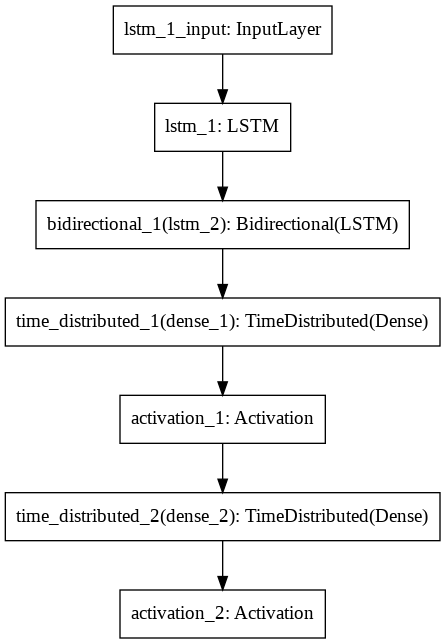

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')


In [ ]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams, test_size=0.2, random_state=42)

In [ ]:
del list_ngrams


In [73]:
BATCH_SIZE = 512
# def generate_data(data, batch_size):
#     cur_index = 0
#     while True:
#         x, y = [], []
#         for i in range(batch_size):  
#             y.append(encoder_data(data[cur_index]))
#             x.append(encoder_data(add_noise(data[cur_index],0.94,0.985)))
#             cur_index += 1
#             if cur_index > len(data)-1:
#                 cur_index = 0
#         yield np.array(x), np.array(y)
train_data = ["Nguyên Khê Hà Nội"]
valid_data = ["Nguyên Khê Hà Nội"]
def generate_data(data, batch_size):
    cur_index = 0
    while True:
        x, y = [], []
        for i in range(batch_size):  
            y.append(encoder_data(data[0]))
            x.append(encoder_data(add_noise(data[0],0.94,0.985)))
            cur_index += 1
            if cur_index > 1024: 
                cur_index = 0
        yield np.array(x), np.array(y)

# def generate_data(data, batch_size):
#     cur_index = 0
#     while True:
#         x, y = [], []
#         for i in range(batch_size):  
#             y.append(data[0])
#             x.append(add_noise(data[0],0.94,0.985))
#             cur_index += 1
#             if cur_index > 100: 
#                 cur_index = 0
#         yield np.array(x), np.array(y)



In [75]:
def generate_data_noisy(data, batch_size):
    cur_index = 0
    while True:
        x, y = [], []
        for i in range(batch_size):  
            y.append(encoder_data(data[0]))
            x.append(encoder_data("bêjnh viện"))
            cur_index += 1
            if cur_index > 100: 
                cur_index = 0
        yield np.array(x), np.array(y)


In [58]:
import os
train_generator = generate_data(train_data, batch_size=BATCH_SIZE)
# train_generator = generate_data_noisy(train_data, batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data, batch_size=BATCH_SIZE)

In [33]:
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)


Current Time = 07:45:28


In [26]:
checkpointer = ModelCheckpoint(filepath=os.path.join('./model/spell_2.h5'), save_best_only=True, verbose=1)

In [74]:
# model.fit_generator(train_generator, steps_per_epoch=len(train_data)//BATCH_SIZE, epochs=50,
#                     validation_data=validation_generator, validation_steps=len(valid_data)//BATCH_SIZE,
#                     callbacks=[checkpointer])
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
checkpointer = ModelCheckpoint(filepath=os.path.join('./model/spell_{}.h5'.format(current_time)), save_best_only=True, verbose=1)
model.fit_generator(train_generator, steps_per_epoch= len(train_data), epochs=20,
                    validation_data=validation_generator, validation_steps = len(valid_data),callbacks=[checkpointer])

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9988

Epoch 00001: val_loss improved from inf to 0.00464, saving model to ./model/spell_07:56:31.h5
Epoch 2/20
1/1 [==============================] - 1s 510ms/step - loss: 9.0424e-04 - accuracy: 0.9998 - val_loss: 0.0021 - val_accuracy: 0.9994

Epoch 00002: val_loss improved from 0.00464 to 0.00210, saving model to ./model/spell_07:56:31.h5
Epoch 3/20
1/1 [==============================] - 0s 459ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 8.2435e-04 - val_accuracy: 0.9998

Epoch 00003: val_loss improved from 0.00210 to 0.00082, saving model to ./model/spell_07:56:31.h5
Epoch 4/20
1/1 [==============================] - 1s 542ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9996

Epoch 00004: val_loss did not improve from 0.00082
Epoch 5/20
1/1 [==============================] - 0s 475ms/step - loss: 0.0013 - accuracy:

In [72]:
model = load_model("./model/spell_07:52:29.h5")
model._make_predict_function()
0.00062

In [79]:
preds = model.predict(np.array([encoder_data("Nguyen Văn Linh")]), verbose=0)
print(decoder_data(preds[0]).strip('\x00'))

Nguyễn Văn Linh


In [132]:
max(model.predict_proba(np.array([encoder_data("Nguyên")])))  

array([[9.9999464e-01, 2.2859581e-06, 5.0485233e-10, ..., 1.1422014e-12,
        2.2981386e-13, 3.9096157e-09],
       [1.1193969e-10, 1.9502078e-05, 1.1713375e-11, ..., 1.2020047e-15,
        3.3262632e-18, 4.3472402e-05],
       [1.4617114e-09, 3.6802010e-08, 2.3486729e-14, ..., 1.5170114e-20,
        3.5680982e-18, 1.7856128e-12],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)